### カーネル主成分分析
高次元空間のデータを祝客する方法の1つに、低次元空間に射影する手法の代表的なものに主成分分析(PCA)がある。
#### 低次元構造の抽出と情報量
主成分分析では、「(何か特定の目的に)必要な」ということには何も関知しないので、とにかくデータの情報量をできるだけ保つような低次元構造を抽出する。
そのために、以下の2つの等価な基準の最適化を行う。

1. 低次元に射影したときに、ばらつきができるだけ大きくなるようにする
2. 縮約したデータをもとのデータの近似とみなしたとき、その近似誤差ができるだけ小さくなるようにする

1次元の正規分布(分散$\sigma^2$,平均$\mu$)
$$
p(x;\mu,\sigma^2)=\exp\biggl(-\frac{(x-\mu)^2}{2\sigma^2}-\frac{1}{2}\ln(2\pi\sigma^2) \biggr)
$$

の情報量を、情報理論で用いられるエントロピーとして計算すると
$$
-\int_{-\infty}^\infty p(x)\ln p(x)dx=\frac{1}{2}+\frac{1}{2}\ln(2\pi\sigma^2)=\frac{1}{2}\ln\sigma^2+定数
$$
となる。分散が大きいことは情報量が大きいことと等価となる。
#### カーネル主成分分析と固有値問題


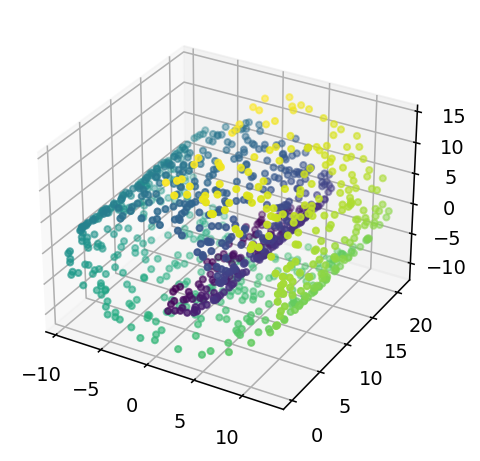

In [66]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt

X, Y = make_swiss_roll(n_samples=1000)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'),dpi=140)
ax.scatter(X[:,0],X[:,1],X[:,2],s=10,c=Y);

平面をロール状に丸めた構造(スイスロール)が空間に埋め込まれている。
このような場合でも、適切な特徴抽出により十分高い次元に移してやれば線形の構造として捉えることができる。

たとえば、$\boldsymbol{x}=(x_1,x_2)^T$という2次元の変数で作られる
$$
a_1x_1+a_2x_2^2+a_3x_3+a_4=0
$$
という式は放物線を表しており、非線形な曲線であるが、
$$
\phi_1(\boldsymbol{x})=x_1,\hspace{3mm}\phi_2(\boldsymbol{x})=x_2^2,\hspace{3mm}\phi_3(\boldsymbol{x})=x_2
$$
という変換を考えると
$$
a_1\phi_1(\boldsymbol{x})+a_2\phi_2(\boldsymbol{x})+a_3\phi_3(\boldsymbol{x})+a_4=0
$$
は、$\phi_1,\phi_2,\phi_3$の作る3次元空間で見れば平面の方程式である。
この平面を取り出すにはたとえば主成分分析を使えばよい。
このように高次元の特徴ベクトルに変換してから、通常の主成分分析を行って、低次元の線形部分空間を求める方法が「カーネル主成分分析」である。
##### 平均0の場合
特徴ベクトル$\boldsymbol{\phi}(\boldsymbol{x})$を1次元の直線上に射影し、
$$
f(\boldsymbol{x})=\boldsymbol{w}^T\boldsymbol{\phi}(\boldsymbol{x})
$$
という関数を考える。ただし、$\boldsymbol{w}$は単位ベクトルであり、
$$
|\boldsymbol{w}|^2=1
$$
を満たす。
簡単のため、$\boldsymbol{\phi}(\boldsymbol{x})$のサンプル平均は0であるとする。
$$
E_n[\boldsymbol{\phi}(\boldsymbol{x})]=\frac{1}{n}\sum_{i=1}^n\boldsymbol{\phi}(\boldsymbol{x}^{(i)})=0
$$
とする。
射影した点のサンプル分散$Var_n[f(\boldsymbol{x})]$とかくと、
$$
Var_n[f(\boldsymbol{x})]=\frac{1}{n}\sum_{i=1}^n(\boldsymbol{w}^T\boldsymbol{\phi}(\boldsymbol{x}^{(i)}))^2
$$
となるので、これを$|\boldsymbol{w}|^2=1$の制約下で最大化するという問題を解けばよい。
Lagrangeの未定乗数法により、
$$
L(\boldsymbol{w})=-Var_n[f(\boldsymbol{x})]+\lambda(|\boldsymbol{w}|^2-1)
$$
の極致問題を解けばよい。
$L(\boldsymbol{w})$を$\boldsymbol{w}$で微分して$\boldsymbol{0}$とおくと、
$$
-\frac{2}{n}\sum_{i=1}^n(\boldsymbol{w}^T\boldsymbol{\phi}(\boldsymbol{x}^{(i)}))\boldsymbol{\phi}(\boldsymbol{x}^{(i)})+2\lambda\boldsymbol{w}=\boldsymbol{0}
$$
となる。$\lambda\neq 0$であれば、$\alpha_i=\boldsymbol{w}^T\boldsymbol{\phi}(\boldsymbol{x}^{(i)})/(n\lambda)$とおくことにより
$$
\boldsymbol{w}=\sum_{i=1}^n\alpha_i\boldsymbol{\phi}(\boldsymbol{x}^{(i)})
$$
という形に書けることがわかる。
すなわち、$f(\boldsymbol{x})$は、
$$
f(\boldsymbol{x})=\sum_{i=1}^n\alpha_i\boldsymbol{\phi}(\boldsymbol{x}^{(i)})^T\boldsymbol{\phi}(\boldsymbol{x})=\sum_{i=1}^n\alpha_ik(\boldsymbol{x}^{(i)},\boldsymbol{x})
$$
と書き直すことができる。
ここで、$f(\boldsymbol{x})$のサンプル分散は
$$
\begin{align}
Var_n[f(\boldsymbol{x})]&=\frac{1}{n}\sum_{l=1}^n(\sum_{i=1}^n\alpha_ik(\boldsymbol{x}^{(i)},\boldsymbol{x}^{(l)}))^2\\
&=\frac{1}{n}\sum_{i=1}^n\sum_{j=1}^n\sum_{l=1}^n\alpha_i\alpha_jk(\boldsymbol{x}^{(i)},\boldsymbol{x}^{(l)})k(\boldsymbol{x}^{(j)},\boldsymbol{x}^{(l)})\\
&=\frac{1}{n}\boldsymbol{\alpha}^TK^2\boldsymbol{\alpha}
\end{align}
$$
と書けるので、$L(\boldsymbol{w})$を$\boldsymbol{\alpha}$で書き直すと
$$
L(\boldsymbol{\alpha})=-\frac{1}{n}\boldsymbol{\alpha}^TK^2\boldsymbol{\alpha}+\lambda(\boldsymbol{\alpha}^TK\boldsymbol{\alpha}-1)
$$
となる。そこで、改めて$\boldsymbol{\alpha}$について微分して$\boldsymbol{0}$とおくと、
$$
-\frac{2}{n}K^2\boldsymbol{\alpha}+2\lambda K\boldsymbol{\alpha}=\boldsymbol{0}
$$
という方程式が得られる。ここで、$K$が正則と仮定すれば
$$
K\boldsymbol{\alpha}=\lambda\boldsymbol{\alpha}
$$
となり、これはグラム行列の固有値問題である。$n\lambda$を改めて$\lambda$と書き直した。
$L(\boldsymbol{\alpha})$にこの式を代入すると
$$
L(\boldsymbol{\alpha})=-\lambda
$$
となるので、$L$を最小化するのは$\lambda$ができるだけ大きな値をとるとき、すなわち$K$の最大固有値のときであることがわかる。
$\boldsymbol{\alpha}^TK\boldsymbol{\alpha}=1$という制約を満たすように$\boldsymbol{\alpha}$を決めればよい。

2次元以上の空間に射影を取りたければ、上から$M$個の固有値をとってきて、対応する固有ベクトルによって張られる空間に射影を取ればよい。
固有値を大きい方から$\lambda_1,\cdots,\lambda_n$とし、対応する固有ベクトルを$\boldsymbol{\alpha}_1,\cdots,\boldsymbol{\alpha}_n$としたとき、
$$
f_j(\boldsymbol{x})=\sum_{i=1}^n\alpha_{ij}k(\boldsymbol{x}^{(i)},\boldsymbol{x}), j=1,\cdots,M,\hspace{3mm}\boldsymbol{\alpha}_j=(\alpha_{j1},\cdots,\alpha_{jn})^T
$$
という$M$個の射影をとることになる。
##### 一般の場合
$f(\boldsymbol{x})$のサンプル平均は
$$
E_n[f(\boldsymbol{x})]=\frac{1}{n}\sum_{l=1}^nf(\boldsymbol{x}^{(l)})=\frac{1}{n}\sum_{i=1}^n\sum_{l=1}^n\alpha_ik(\boldsymbol{x}^{(i)},\boldsymbol{x}^{(l)})=\frac{1}{n}\boldsymbol{\alpha}^TK\boldsymbol{1}
$$
と書き表せる。
平均の2乗は
$$
E_n[f(\boldsymbol{x})]^2=\frac{1}{n^2}(\boldsymbol{\alpha}^TK\boldsymbol{1})^2=\frac{1}{n^2}(\boldsymbol{\alpha}^TK\boldsymbol{1})(\boldsymbol{1}^TK\boldsymbol{\alpha})
$$
となるから、これを二乗平均から引くと分散は
$$
Var_n[f(\boldsymbol{x})]=\frac{1}{n}\boldsymbol{\alpha}^TKJ_nK\boldsymbol{\alpha}
$$
となる。
ただし、$J_n$は
$$
J_n=I_n-\frac{1}{n}\boldsymbol{1}\boldsymbol{1}^T
$$
という行列である。
したがって、
$$
J_nK\boldsymbol{\alpha}=\lambda\boldsymbol{\alpha}
$$
という固有値問題を解くことに帰着される。
##### カーネル主成分分析
1. データ点の集合$\boldsymbol{x}^{(1)},\boldsymbol{x}^{(2)},\cdots,\boldsymbol{x}^{(n)}$から、グラム行列$K(K_{ij}=k(\boldsymbol{x}^{(i)},\boldsymbol{x}^{(j)}))$を作る
2. $J_nK\boldsymbol{\alpha}=\lambda\boldsymbol{\alpha}$という固有値問題を解く
3. 固有値の大きい順に非線形変換を構成する

カーネル主成分分析は特徴ベクトルの選び方(カーネル関数の選び方)によって結果が大きく変化する。
実際、カーネル関数のパラメータを変化させると結果が大きく変化する。
妥当と思える結果を得るためには、もとの空間やデータの構造をうまく反映した適切なカーネル関数を定義する必要がある。
今までと違い、今度は関数をデータに応じて変えるものである。

In [4]:
import numpy as np

def rbf(x1, x2, beta):
    return np.exp(-beta*((x1-x2).T@(x1-x2)))

def polynomial(x1, x2, c, p):
    return (x1@x2.T+c)**p

def Kernel(x1, x2, kernel, **param):
    return np.array([[kernel(x1=xx1, x2=xx2, **param) for xx2 in x2] for xx1 in x1])

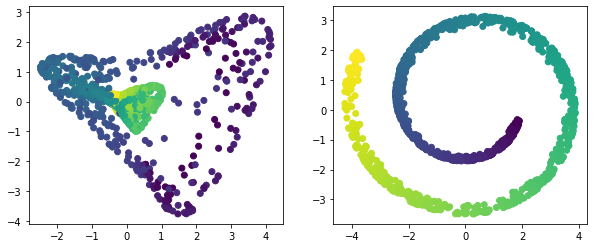

In [143]:
betas = [0.05, 0.001]
n = len(X)

fig, ax = plt.subplots(1,2,figsize=(10,4))
for i in range(2):
    K = Kernel(X, X, rbf, beta=betas[i])
    Jn = np.eye(n) - np.ones((n,n))/n
    M = Jn@K

    eig_values, eig_vectors = np.linalg.eig(M)
    alpha = np.real(eig_vectors[:,:2])

    x_pca = K@alpha

    ax[i].scatter(x_pca[:,0], x_pca[:,1], c=Y);

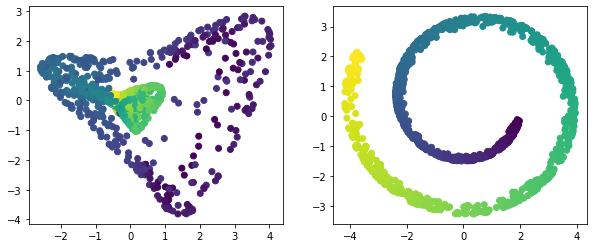

In [144]:
betas = [0.05, 0.001]
n = len(X)

fig, ax = plt.subplots(1,2,figsize=(10,4))
for i in range(2):
    K = Kernel(X, X, rbf, beta=betas[i])
    Jn = np.eye(n) - np.ones((n,n))/n
    M = Jn@K

    eig_values, eig_vectors = np.linalg.eig(M)
    
    x_pca1 = np.real(eig_values[0])*np.real(eig_vectors[:,0])
    x_pca2 = np.real(eig_values[1])*np.real(eig_vectors[:,1])

    ax[i].scatter(x_pca1, x_pca2, c=Y);

### 次元圧縮とデータ依存カーネル
ここでは、データに依存したカーネルを使った次元圧縮のいくつかの手法を説明する。
いずれも基本的にはカーネル主成分分析とカーネル関数の計算が異なるだけで同じく固有値問題を解くことに帰着される。
#### 次元圧縮とカーネル法の等価性
「データを次元圧縮する」といったとき、それは以下の微妙に異なる2つの場合を指す。

1. 与えられたサンプルの低次元表現を求める(古くからある多次元尺度更生法(MDS))
2. 高次元空間$\boldsymbol{x}$から低次元空間への写像を求める(カーネル主成分分析)

前者が、与えられたサンプルのみに着目してその次元を小さくしようとしているのに対し、後者はサンプルに含まれていない新規データが与えられた場合にも低次元空間に移すことを可能としている点で、より一般的である。
両者は同じ固有値問題に基づくもので、以下に示すように互いに等価なものである。
平均0の場合のカーネル主成分分析の解は、低次元空間の写像として、
$$
f_j(\boldsymbol{x})=\sum_{i=1}^n\alpha_{ji}k(\boldsymbol{x}^{(i)},\boldsymbol{x}),\hspace{3mm}K\boldsymbol{\alpha}_j=\lambda_j\boldsymbol{\alpha}_j
$$

によって求められた。これを使って、サンプル$\boldsymbol{x}^{(l)}$の低次元表現を計算してみると、
$$
f_j(\boldsymbol{x}^{(l)})=\sum_{i=1}^n\alpha_{ji}k(\boldsymbol{x}^{(i)},\boldsymbol{x}^{(l)})=(K\boldsymbol{\alpha}_j)_l=\lambda_j\alpha_{jl}
$$
となる。
したがって、$M$個のベクトル$\boldsymbol{\alpha}_1,\boldsymbol{\alpha}_2,\cdots,\boldsymbol{\alpha}_M$の$l$番目の成分を集めてくれば$\boldsymbol{x}^{(l)}$の$M$次元表現
$$
\boldsymbol{\beta}_l=(\lambda_1\alpha_{1l},\lambda_2\alpha_{2l},\cdots,\lambda_M\alpha_{Ml})^T
$$
が得られる。

#### ラプラシアン固有マップ法：グラフ上の物理モデルに基づく次元圧縮
##### グラム行列とグラフ構造
サンプルデータは有限の点なのでグラフの頂点に対応付けられる。
また、カーネル関数は二つのデータ間から決まるので、頂点と頂点を結ぶ枝で二つのデータ間の関連性を表現する。
カーネル関数は対称なので無向グラフで考える。また、すべてのノードを結ぶ枝があるような完全グラフで考える。
##### ラプラシアン固有マップ法
サンプルに対応するグラフの枝に重みをつけることを考える。
近いデータは大きな重みを、遠いデータは小さな重みとなるようにする。
$i$と$j$を結ぶ枝の重み$K_{ij}$を成分とする行列を$K$とする。
ここではサンプルを1次元の値に縮約して表現することを考える。
$i$番目のサンプル表現$\beta_i$を決めるために、データ間の重み付き差を小さくすることを考える。
$$
\min_{\boldsymbol{\beta}}\sum_{i,j}K_{ij}(\beta_i-\beta_j)^2
$$

という問題を解く。
2次式で書くと、
$$
\sum_{i,j}(\beta_i-\beta_j)^2K_{ij}=2\boldsymbol{\beta}^TP\boldsymbol{\beta}
$$

とおく。ここで、対角行列$\Lambda$を
$$
\Lambda_{ii}=\sum_{j=1}^nK_{ij}
$$
とおくと、$P$は
$$
P=\Lambda-K
$$
と書けるが、これはグラフ上のラプラス作用素として知られているもので、グラフ上の熱伝導と関連付けられる。
$\beta_i$は定数倍しても本質的に等価であるから、自由度を除くために
$$
\boldsymbol{\beta}^T\Lambda\boldsymbol{\beta}=1
$$
という制約をおく。すると、ラグランジュ関数が
$$
L(\boldsymbol{\beta})=\boldsymbol{\beta}^TP\boldsymbol{\beta}-\lambda(\boldsymbol{\beta}^T\Lambda\boldsymbol{\beta}-1)
$$
となるような最適化問題となるので、これを$\boldsymbol{\beta}$で微分して$\boldsymbol{0}$とおくと、
$$
P\boldsymbol{\beta}=\lambda\Lambda\boldsymbol{\beta}
$$
という、一般化固有値問題の最小固有値に対応する固有ベクトルを求めることに帰着される。
固有値0で$\boldsymbol{\beta}\propto\boldsymbol{1}$という自明な解をもつのでそれは除いて、それより大きい最小の固有値に対応する固有ベクトルから順番に$\boldsymbol{\beta}_1,\boldsymbol{\beta}_2,\cdots$と取っていけばよい。
$P=\Lambda-K$から、
$$
K\boldsymbol{\beta}=\lambda'\Lambda\boldsymbol{\beta},\hspace{3mm}\lambda'=1-\lambda
$$
となり、$\lambda$の最小化は、こちらの固有値問題では固有値$\lambda'$の最大化となる。

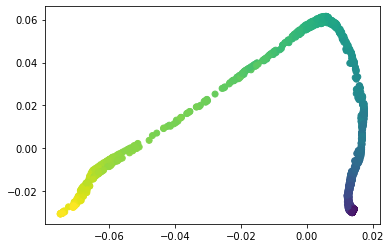

In [145]:
from scipy.linalg import eig

K = Kernel(X, X, rbf, beta=0.14)

Lamda = np.diag(K.sum(axis=1))
P = Lamda - K

eig_values, eig_vectors = eig(P, Lamda)
x_lap = eig_vectors[:,1:3]

plt.scatter(x_lap[:,0], x_lap[:,1], c=Y);

#### ISOMAP:多様体上の距離学習に基づく次元圧縮
##### 次元圧縮と多様体のあてはめ
次元圧縮の目的は、高次元空間の中でデータによくあてはまる曲線や曲面といった低次元の部分空間を見つけることである。
そうした部分空間のことを多様体と呼ぶ。

##### 多様体上の距離
ISOMAPでは多様体の上の距離に着目して構造の摘出を行う。
カーネル関数は特徴ベクトル間の類似度あるいは近さを表していると考えることができる。
与えられたサンプルがユークリッド空間を伸縮せずにねじまげたような多様体の上にあるとする。
多様体上のある点からある点への距離は、ユークリッド空間を伸縮さえしなければねじまげても変化しない。
点の間の距離が正しく推定できれば、それをできるだけ保つようなデータの空間配置を見つけることができる。
これがISOMAPの基本的な考え方である。
与えられているのは多様体上にあるサンプル点だけなので多様体をそのサンプル点を使って表現し、その上で最短距離を近似的に求める必要がある。
そのために、サンプル点を端点とする近傍グラフというものを作る。
各サンプル同士のユークリッド距離を測り、あらかじめ決めたしきい値$\varepsilon$以下、あるいは$k$個の近傍について枝を結ぶ。
すると多様体を骨組み構造で近似したようなものができる。
多様体は局所的にはユークリッド空間と見なせるので、近くの点までの距離はその直線距離で近似することができる。
一方、遠くの点までの距離は近くの点までの最短距離をつないでいったものである。
多様体上の経路をグラフの枝をたどった経路で近似したものと考え、グラフ上での最短経路を計算する。

##### 距離からカーネルへ
距離がユークリッド距離と見なせる場合を考える。
ここでは、ある特徴ベクトルがあって、その間のユークリッド距離として距離が与えられている場合を考える。
特徴ベクトル$\boldsymbol{\phi}(\boldsymbol{x})$をユークリッド空間上の点と見なすと、
$$
|\boldsymbol{\phi}(\boldsymbol{x}^{(i)})-\boldsymbol{\phi}(\boldsymbol{x}^{(j)})|^2=|\boldsymbol{\phi}(\boldsymbol{x}^{(i)})|^2+|\boldsymbol{\phi}(\boldsymbol{x}^{(j)})|^2-2\boldsymbol{\phi}(\boldsymbol{x}^{(i)})^T\boldsymbol{\phi}(\boldsymbol{x}^{(j)})
$$
より、
$$
k(\boldsymbol{x}^{(i)},\boldsymbol{x}^{(j)})=-\frac{1}{2}(|\boldsymbol{\phi}(\boldsymbol{x}^{(i)})-\boldsymbol{\phi}(\boldsymbol{x}^{(j)})|^2-|\boldsymbol{\phi}(\boldsymbol{x}^{(i)})|^2-|\boldsymbol{\phi}(\boldsymbol{x}^{(j)})|^2)
$$
という関係があるので、これが距離からカーネルを計算する基本式となる。
多くの問題ではサンプル同士の距離だけしかわからない場合も多い。
そこで、$n$個のデータ集合の要素の間の距離を要素としてもつ行列$D$が与えられる場合に、そこからグラム行列を計算する方法を考える。
$D$の$i,j$成分$D_{ij}$が$\boldsymbol{x}^{(i)}$と$(\boldsymbol{x}^{(j)}$の間の距離を表すとする。
$$
D_{ij}=|\boldsymbol{\phi}(\boldsymbol{x}^{(i)})|^2+|\boldsymbol{\phi}(\boldsymbol{x}^{(j)})|^2=K_{ii}+K_{jj}-2K_{ij}
$$

という形の関係式が得られる。
特徴ベクトル全体を平行移動してもお互いの間の距離は変化しないが、原点の位置が変わるため内積の値は変化する。
サンプル点間の距離を求めるだけではカーネルの値はただ一つに定まらない。
その不定性を消すために、ここでは特徴ベクトルのサンプル平均が$\boldsymbol{0}$になるように決めることとする。
$$
\sum_{i=1}^n\boldsymbol{\phi}(\boldsymbol{x}^{(i)})=\boldsymbol{0}
$$
これと、$\boldsymbol{\phi}(\boldsymbol{x}^{(j)})$との内積をとると、
$$
\sum_{i=1}^n\boldsymbol{\phi}(\boldsymbol{x}^{(i)})^T\boldsymbol{\phi}(\boldsymbol{x}^{(j)})=\sum_{i=1}^nK_{ij}=0
$$
となる(対称性から$j$についての和も0となる)
$D_{ij}$を$i$について足し合わせると
$$
\sum_{i=1}^nD_{ij}=\sum_{i=1}^nK_{ii}+nK_{jj}
$$
となり、$j$についても同様に
$$
\sum_{j=1}^nD_{ij}=nK_{ii}+\sum_{j=1}^nK_{jj}
$$
となる。また、すべての総和は、
$$
\sum_{i=1}^n\sum_{j=1}^nD_{ij}=2n\sum_{i=1}^nK_{ii}
$$
となるので、これらの式かを用いて距離からカーネルを求める式
$$
-D_{ij}+\frac{1}{n}\sum_{i'=1}^nD_{i'j}+\frac{1}{n}\sum_{j'=1}^nD_{ij'}-\frac{1}{n^2}\sum_{i'=1}^n\sum_{j'=1}^nD_{i'j'}=2K_{ij}
$$
が得られる。これは、多変量解析で二重中心化と呼ばれているものである。

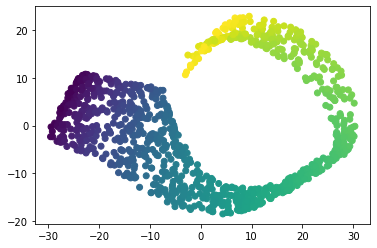

In [148]:
from sklearn import manifold

isomap = manifold.Isomap(n_neighbors=20, n_components=2)
X_isomap = isomap.fit_transform(X)


plt.scatter(X_isomap[:,0], X_isomap[:,1], c=Y);

#### 局所線形埋め込み法：線形モデルの貼り合わせによる次元圧縮
多様体は狭い範囲で見れば線形空間と見なすことができる。
この性質に着目し、次のような2ステップからなるアルゴリズムによって多様体のあてはめを行うのが局所線形埋め込み法(LLE)である。

1. 狭い範囲の点だけを使って低次元の線形モデルを当てはめる
2. そのような線形空間をなめらかにつなぐことにより全体の多様体を推定する

低次元の線形モデルを当てはめるために、近傍の点の間の線形関係をみつける。
具体的には各サンプル点$\boldsymbol{x}^{(i)}$を近傍の点$\{\boldsymbol{x}^{(j)}\in N_i\}$で表現する。
つまり、近傍の点を決めたのち、
$$
\min_W |\boldsymbol{x}^{(i)}-\sum_{j\in N_i}W_{ij}\boldsymbol{x}^{(j)}|^2
$$

という最小化問題を解いて$W_{ij}$を求める(近傍に入っていない$j$については$W_{ij}=0$とおく)
ここで、重み$W_{ij}$には$\sum_j W_{ij}=1$という制約をおくことにする。
次に、求めた線形モデルをなめらかにつなぐことを考える。
簡単のため1次元の多様体のあてはめで説明する。
多様体上の座標系は1次元で$\beta$とする。
$\beta$に関しても$\boldsymbol{x}$同様の線形関係が成り立つはずだが、今度は一つの近傍系だけでなく、各点が含まれているすべての近傍系でこの関係が成り立っているようにしたい。
つまり、$\boldsymbol{x}^{(i)}$に対応する多様体上の座標$\beta_i$が上の関係式を満たすようにしたい。
$$
\min_{\boldsymbol{\beta}}\sum_{i=1}^n(\beta_i-\sum_{j\in N_i}W_{ij}\beta_j)^2
$$
となるように$\boldsymbol{\beta}=(\beta_1,\cdots,\beta_n)^T$を定める。
$\boldsymbol{\beta}$はスケール倍しても本質的な情報は変わらないので、大きさが1であるという制約条件$|\boldsymbol{\beta}|^2=1$を入れてラグランジュの未定乗数法を適用すると、ラグランジュ関数が
$$
|(I-W)\boldsymbol{\beta}|^2-\lambda(|\boldsymbol{\beta}|^2-1)
$$
と書けるので、$\boldsymbol{\beta}$で微分することにより、
$$
(I-W)^T(I-W)\boldsymbol{\beta}=\lambda \boldsymbol{\beta}
$$
という固有値問題に帰着される。
上の式の$(I-W)^T(I-W)$を展開すると、$I-W-W^T+W^TW$となり、この固有値最小化は、
$$
(W+W^T-W^TW)\boldsymbol{\beta}=(1-\lambda)\boldsymbol{\beta}
$$
と書けるので、
$$
\tilde{K}=W;W^T-W^TW
$$
という行列の固有値最大化と等価になる。ただし、これは正定値であるという保証がないので、適当な正の数$c$を使って、
$$
K=\tilde{K}+cI_n
$$
とすれば$K$は正定値にできる。
したがって局所線形埋め込み法は、この行列に対するカーネル主成分分析ととらえることができる。

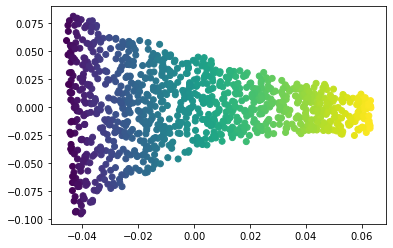

In [152]:
from sklearn import manifold

X_lle = manifold.locally_linear_embedding(X, n_neighbors=15, n_components=2)[0]

plt.scatter(X_lle[:,0], X_lle[:,1], c=Y);

### クラスタリング
まず、クラスタリングの基本的なアルゴリズムであるk-平均法をカーネルを用いて一般化する方法について述べる。
k-平均法は大域的最適解を保証するとは限らないアルゴリズムである。
そこで次に、固有値問題の解として得られるスペクトラルクラスタリングについて述べる。

#### カーネルk-平均法
サンプル点集合$\boldsymbol{x}^{(1)},\boldsymbol{x}^{(2)},\cdots,\boldsymbol{x}^{(n)}$が与えられ、その特徴ベクトル$\boldsymbol{\phi}(\boldsymbol{x}^{(1)}),\boldsymbol{\phi}(\boldsymbol{x}^{(2)},\cdots,\boldsymbol{\phi}(\boldsymbol{x}^{(n)}))$とするとき、それをグループ分けすることを考える。
代表点の個数$c$はあらかじめ決めておく、代表点は$\boldsymbol{\mu}_1,\boldsymbol{\mu}_2,\cdots,\boldsymbol{\mu}_c$とする。
それぞれのサンプル点は、その点に最も近い代表点のグループに入ることとする。
また、逆に代表点はグループに属するサンプル点の重心に取ることにする。
代表点$\boldsymbol{\mu}_i$に対応するグループのメンバーの集合$N_i$は、
$$
N_i=\{\boldsymbol{x}^{(l)}|\boldsymbol{\mu}_i=\arg\min_{\boldsymbol{\mu}_j}|\boldsymbol{\phi}(\boldsymbol{x}^{(l)}-\boldsymbol{\mu}_j)|^2\}
$$
で表され、そのグループのメンバーを使って代表点は、
$$
\boldsymbol{\mu}_i=\frac{1}{|N_i|}\sum_{\boldsymbol{x}^{(j)}\in N_i}\boldsymbol{\phi}(\boldsymbol{x}^{(j)})
$$
となる。
このとき、代表点からメンバーへの二乗距離の総和ができるだけ小さくなるように代表点を決める。
$$
L=\sum_{i=1}^c\sum_{\boldsymbol{x}^{(j)}\in N_i}|\boldsymbol{\phi}(\boldsymbol{x}^{(j)})-\boldsymbol{\mu}_i|^2
$$
を最小化するように$N_i,\boldsymbol{\mu}_i$を決める問題である。
どのグループに属しているかを判定するために特徴ベクトルと代表ベクトルとの距離を計算する必要がある。
$$
\begin{align}
|\boldsymbol{\phi}(\boldsymbol{x}^{(j)}-\boldsymbol{\mu}_i)|^2&=\biggl|\boldsymbol{\phi}(\boldsymbol{x}^{(j)})-\frac{1}{|N_i|}\sum_{\boldsymbol{x}^{(l)}\in N_i}\boldsymbol{\phi}(\boldsymbol{x}^{(l)}) \biggr|^2\\
&=k(\boldsymbol{x}^{(j)},\boldsymbol{x}^{(j)})-\frac{2}{|N_i|}\sum_{\boldsymbol{x}^{(l)}\in N_i}k(\boldsymbol{x}^{(j)},\boldsymbol{x}^{(l)})+\frac{1}{|N_i|^2}\sum_{\boldsymbol{x}^{(l)}\in N_i}\sum_{\boldsymbol{x}^{(m)}\in N_i}k(\boldsymbol{x}^{(l)},\boldsymbol{x}^{(m)})
\end{align}
$$
となり、カーネル関数だけを使って書き表される。
つまり、$\boldsymbol{\phi}(\boldsymbol{x}^{(j)}$や$\boldsymbol{\mu}_i$は陽に計算する必要がない。

カーネルk-平均法
1. サンプルを適当に$c$個のグループに分け、$N_i$を初期化する
2. 上の$|\boldsymbol{\phi}(\boldsymbol{x}^{(j)}-\boldsymbol{\mu}_i)|^2$に基づいて$N_i$を更新する
3. グループ分けが収束するまでステップ2を繰り返す

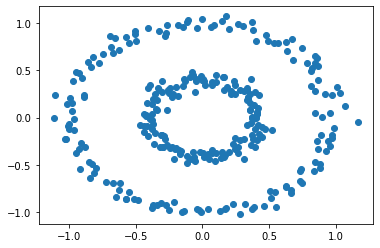

In [105]:
from sklearn.datasets import make_circles

X, Y = make_circles(n_samples=300,
                    shuffle=True,
                    noise=0.05,
                    factor=0.4)

a, b = X[:,0], X[:,1]

plt.scatter(a, b);

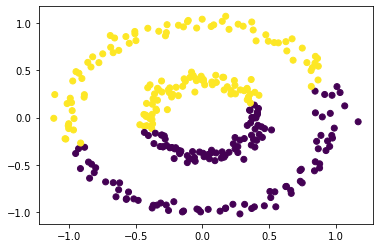

In [106]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
x_kmeans = kmeans.predict(X)

plt.scatter(a, b, c=x_kmeans)

In [107]:
from scipy.stats import bernoulli

K = Kernel(X, X, rbf, beta=6)

In [108]:
def calc_dist(N, Ni):
    return np.diag(K) - 2/(np.sum(N==Ni))*K[:,N==Ni].sum(axis=1) + 1/(np.sum(N==Ni)**2)*K[:,N==Ni].sum(axis=1)[N==Ni].sum()

def kernel_k_means(classes=2, n=200):
    N = bernoulli.rvs(p=0.5, size=len(X))
    newN = N
    for j in range(n):
        newN = np.array([calc_dist(N=newN, Ni=i) for i in range(classes)]).argmin(axis=0)
        if (N == newN).all():
            break
        else:
            N = newN
    return N

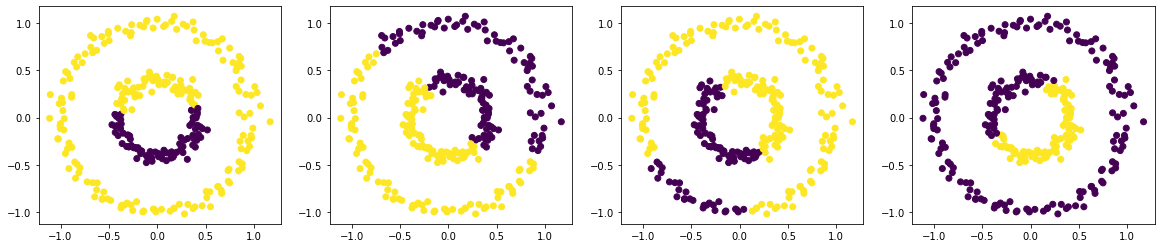

In [109]:
fig, ax = plt.subplots(1,4, figsize=(20,4))

for i in range(4):
    ax[i].scatter(a, b, c=kernel_k_means())

#### スペクトラルクラスタリング
k-平均法は、反復演算を必要とする点と、収束解が必ずしも目的関数を最適にするものではないという欠点を持っていた。

簡単のため二つのグループだけの場合を考える。
それぞれのグループに1,-1という離散値を割り当てると、クラスタリングは、各サンプル$\boldsymbol{x}^{(i)}$に対してグループに対応するラベル$\beta_i=±1$を割り当てる問題ととらえることができる。
ここで、サンプル点から作られるグラフ構造を考える。各頂点がサンプル点で、枝にはサンプル点どうしの近さを表す重みがついている。
サンプル点を二つのグループに分けると、それにともなってグラフも二分割される。
分割されたグループ間を結ぶ枝のことを分割のカットと呼ぶ。
グループ内はできるだけ近いもの同士が集まり、グループ間は遠く離れていることが望ましいから、このカットの重みの合計は小さいほど良い・
$$
\min_{\boldsymbol{\beta}}\sum_{i,j}K_{ij}(\beta_i-\beta_j)^2=2\boldsymbol{\beta}^TP\boldsymbol{\beta},\hspace{5mm}\beta_i=±1
$$
となる。
ここで、対角行列$\Lambda$を$\Lambda_{ii}=\sum_{j=1}^nK_{ij}$と定義すれば、$P=\Lambda-K$と書ける。
$\boldsymbol{\beta}$は任意の実数ベクトルとし、$\boldsymbol{\beta}^T\Lambda\boldsymbol{\beta}=1$とする。
これは、ラプラシアン固有マップ法と完全に等価な最小化問題となる。
このように整数計画問題を緩和した固有値問題を解くことによってクラスタリングを行う手法をスペクトラルクラスタリングと呼ぶ。


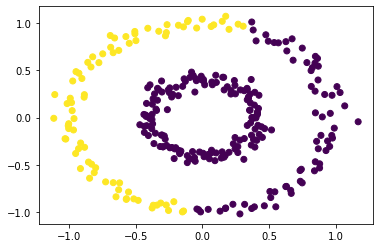

In [110]:
from sklearn.cluster import SpectralClustering

spc = SpectralClustering(n_clusters=2, affinity='rbf', gamma=12)
spc.fit(X)
x_spc = spc.labels_

plt.scatter(a, b, c=x_spc)

### 判別分析と正準相関分析
#### カーネル判別分析
##### 離散目的変数がある場合の次元圧縮
(線形)判別分析(LDA)は、クラスを表す離散の目的変数がある場合の次元圧縮方法である。
判別分析ではクラス識別そのものではなく、クラス時期別の前段階として有効と考えられる特別な基準を設定する。
すなわち、「同じクラスに属するサンプルの散らばりは小さく、クラス同士の間の散らばりは大きくなるように」次元圧縮を行う。
まず、次元圧縮の関数として特徴ベクトルの線形和で定義される1変数関数
$$
f(\boldsymbol{x})=\boldsymbol{w}^T\boldsymbol{\phi}(\boldsymbol{x})
$$
を考える。
各サンプル$\boldsymbol{x}^{(i)}$にはクラスラベル$y^{(i)}$がついている。クラス数は$c$とし、$y^{(i)}$は$1,\cdots,c$のどれかの値を取るとする。
上に述べた基準は、
$$
\max_f\frac{\sigma_B^2}{\sigma_W^2}
$$
と書くことができる。
ただし、$\sigma_B^2$と$\sigma_W^2$はそれぞれクラス間分散、クラス内分散と呼ばれるものである。
判別分析をカーネル法で行う場合、過学習を起こしてしまうため、$\lambda |\boldsymbol{w}|^2$という正則化項を考える。
すると、リプレゼンターの定理から、
$$
f(\boldsymbol{x})=\sum_{i=1}^n\alpha_ik(\boldsymbol{x}^{(i)}, \boldsymbol{x})
$$
という形を仮定することができる。
さて、クラス内分散$\sigma_W^2$は、各クラス$l$ごとの分散を$\sigma_l^2$としたとき、その平均
$$
\sigma_W^2=\frac{1}{n}\sum_{l=i}^cn_l\sigma_l^2
$$
として定義される。ただし、$n_l$はクラス$l$に属するサンプルの数である。
各クラス$l$に属するサンプルに対する$f(\boldsymbol{x})$の平均を求めると、
$$
\mu_l=\frac{1}{n_l}\sum_{i=1}^n\biggl(\alpha_i\sum_{j:y^{(j)}=1}k(\boldsymbol{x}^{(i)},\boldsymbol{x}^{(j)}) \biggr)=\sum_{i=1}^n\alpha_i\bar{k}_{i,l}
$$
となる。ただし、
$$
\bar{k}_{i,l}=\frac{1}{n_l}\sum_{j:y^{(j)}=l}k(\boldsymbol{x}^{(i)},\boldsymbol{x}^{(j)})
$$
とおいた。
したがって、クラス$l$のサンプルに対する$f(\boldsymbol{x}^{(j)})$の分散は、
$$
\begin{align}
\sigma_l^2&=\frac{1}{n_l}\sum_{j:y^{(j)}=l}(f(\boldsymbol{x}^{(j)})-\mu_l)^2\\
&=\frac{1}{n_l}\sum_{j:y^{(j)}=l}\bigl(\sum_{i=1}^n\alpha_i(k(\boldsymbol{x}^{(i)},\boldsymbol{x}^{(j)})-\bar{k}_{i,l}) \bigr)^2\\
&=\frac{1}{n_l}\sum_{i=1}^n\sum_{i'=1}^n\biggl[\alpha_i\alpha_{i'}\sum_{j:y^{(j)}=l}(k(\boldsymbol{x}^{(i)},\boldsymbol{x}^{(j)})-\bar{k}_{i,l})(k(\boldsymbol{x}^{(i')},\boldsymbol{x}^{(j)})-\bar{k}_{i,l}) \biggr]\\
&=\boldsymbol{\alpha}^TS_l\boldsymbol{\alpha}
\end{align}
$$
となる。
ただし、行列$S_l$の$i,i'$成分
$$
(S_l)_{ii'}=\frac{1}{n_l}\sum_{j:y^{(j)}=l}(k(\boldsymbol{x}^{(i)},\boldsymbol{x}^{(j)})-\bar{k}_{i,l})(k(\boldsymbol{x}^{(i')},\boldsymbol{x}^{(j)})-\bar{k}_{i,l})
$$
とした。
このように$\sigma_l^2$は$\alpha$についての2次形式で書けるので、
$$
\sigma_W^2=\frac{1}{n}\sum_{l=1}^cn_l\sigma_l^2=\boldsymbol{\alpha}^TV_W\boldsymbol{\alpha}
$$
が得られる。$V_W$は$S_l$から
$$
V_W=\frac{1}{n}\sum_{l=1}^cn_lS_l
$$
一方。クラス間分散は各クラス同士の分散として、
$$
\sigma_B^2=\sum_{l=1}^c\frac{n_l}{n}(\mu_l-\mu_T)^2
$$
と定義される。
ここで$\mu_T$はサンプル全体に関する平均
$$
\mu_T=\frac{1}{n}\sum_{i=1}^n\biggl(\alpha_i\sum_{j=1}^nk(\boldsymbol{x}^{(l)},\boldsymbol{x}^{(j)}) \biggr)
$$
である。
$\mu_l,\mu_T$が$\boldsymbol{\alpha}$の1次式で書けているから、$\sigma_B^2$も$\boldsymbol{\alpha}$の2次形式となり、
$$
\sigma_B^2=\boldsymbol{\alpha}^TV_B\boldsymbol{\alpha}
$$
という形になる。
$V_B$は、
$$
(V_B)_{ii'}=\frac{1}{n}\sum_{l=1}^cn_l(\bar{k}_{i,l}-\bar{k}_{i,T})(\bar{k}_{i',l}-\bar{k}_{i',T})
$$
と求まる。

##### 2次形式の比の最適化
分母、分子とも2次形式であれば、$\boldsymbol{\alpha}$を定数倍しても値は変化しない。
そこで分母にある$\sigma_W^2$を1と仮定しても問題ない。
すると、この制約下で分子の$\sigma_B^2$を最大化する問題に帰着される。
制約付きの最適化問題はラグランジュの未定乗数法で定式化できる。
$$
L(\boldsymbol{\alpha})=\boldsymbol{\alpha}^TV_B\boldsymbol{\alpha}-\lambda(\boldsymbol{\alpha}^TV_W\boldsymbol{\alpha}-1)
$$
の極致問題として解けるが、このままでは過学習を起こすため、正則化項を加えた
$$
\tilde{L}(\boldsymbol{\alpha})=\boldsymbol{\alpha}^TV_B\boldsymbol{\alpha}-\lambda\biggl\{\boldsymbol{\alpha}^T(V_W+\zeta K)\boldsymbol{\alpha}-1\biggr\}
$$
を考える必要がある($\zeta$は正則化パラメータ)。
$\tilde{L}(\boldsymbol{\alpha})$を$\boldsymbol{\alpha}$について微分すると、
$$
V_B\boldsymbol{\alpha}=\lambda(V_W+\zeta K)\boldsymbol{\alpha}
$$
という一般化固有値問題として定式化できる。
こうして得られた$\boldsymbol{\alpha}$を$f(\boldsymbol{x})$の式に代入して得られた関数が線形判別分析をカーネルにより一般化したカーネル判別分析の解である。

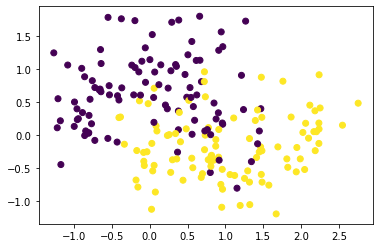

In [250]:
from sklearn.datasets import make_moons

X, Y = make_moons(n_samples=200, shuffle=True, noise=0.4)

plt.scatter(X[:,0], X[:,1], c=Y)

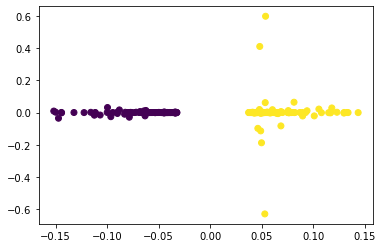

In [251]:
from scipy.linalg import eig

zeta = 0.1

k = Kernel(X, X, rbf, beta=4)
kl = np.array([k[Y==0].mean(axis=0),
               k[Y==1].mean(axis=0)])
kT = kl.mean(axis=0)

Sl = np.array([(k - kl[i]).T@(k - kl[i]) / len(kl[i]) for i in range(len(kl))])

Vw = np.sum([len(kl[i]) * Sl[i] for i in range(len(kl))], axis=0) / len(k)
Vb = np.sum([len(kl[i]) * (kl[i] - kT).reshape(-1,1)@(kl[i] - kT).reshape(1,-1) for i in range(len(kl))], axis=0) / len(k)

eig_values, eig_vectors = eig(Vb, Vw+zeta*k)
x_klda = eig_vectors[:,1:3]

plt.scatter(x_klda[:,0], x_klda[:,1], c=Y)

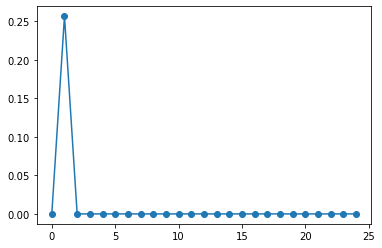

In [252]:
plt.plot(np.abs(eig_values)[:25], '-o')

判別分析で抽出される部分空間の次元は最大で「クラス数-1」である。
#### カーネル正準相関分析
正準相関分析(CCA)は、複数の情報源に共通して含まれる情報だけを抽出することによって、情報を統合するための次元圧縮の手法である。
ここで、二つの多変量$\boldsymbol{x},\boldsymbol{y}$が同時に観測されるという状況を考える。
正準相関分析では、$\boldsymbol{x},\boldsymbol{y}$それぞれを同じ次元の空間に次元圧縮する。
以下では簡単のため1次元の関数$f(\boldsymbol{x}),g(\boldsymbol{y})$という関数を求めることを考える。
その際、$f(\boldsymbol{x})$と$g(\boldsymbol{y})$が$\boldsymbol{x}$と$\boldsymbol{y}$に共通して含まれる情報を担うようにするために、それらの間の相関係数が最大になるように関数$f$や$g$を求める。

まず、
$$
f(\boldsymbol{x})=\boldsymbol{a}^T\boldsymbol{\phi}_x(\boldsymbol{x})\\
g(\boldsymbol{y})=\boldsymbol{b}^T\boldsymbol{\phi}_y(\boldsymbol{y})
$$
という形の関数を考える。
正準相関分析ではサンプル相関係数
$$
\rho_n=Cor_n[f(\boldsymbol{x}),g(\boldsymbol{y})]=\frac{Cov[f(\boldsymbol{x}),g(\boldsymbol{y})]}{\sqrt{Var_n[f(\boldsymbol{x})]}\sqrt{Var_n[g(\boldsymbol{y})]}}
$$
の最大化が目的である。
過学習が起きてしまうため、正則化を行うこととし、$\zeta_x|\boldsymbol{a}|^2+\zeta_y|\boldsymbol{b}|^2$を正則化項として選ぶ。
$$
f(\boldsymbol{x})=\sum_{i=1}^n\alpha_ik_x(\boldsymbol{x}^{(i)},\boldsymbol{x})\\
g(\boldsymbol{y})=\sum_{i=1}^n\beta_ik_x(\boldsymbol{y}^{(i)},\boldsymbol{y})
$$

という形で書ける。
$k_x,k_y$は$\boldsymbol{x},\boldsymbol{y}$それぞれの特徴ベクトルの内積で定義されるカーネル関数
$$
k_x(\boldsymbol{x},\boldsymbol{x}')=\boldsymbol{\phi}_x(\boldsymbol{x})^T\boldsymbol{\phi}_x(\boldsymbol{x}')\\
k_y(\boldsymbol{y},\boldsymbol{y}')=\boldsymbol{\phi}_y(\boldsymbol{y})^T\boldsymbol{\phi}_y(\boldsymbol{y}')
$$
である。
相関係数を計算するためにまず、$f(\boldsymbol{x})$と$g(\boldsymbol{y})$の分散や共分散を計算する。
分散はカーネル主成分分析で考えた式と同じで、
$$
Var_n[f(\boldsymbol{x})]=\frac{1}{n}\boldsymbol{\alpha}^TK_xJ_nK_x\boldsymbol{\alpha}\\
Var_n[g(\boldsymbol{y})]=\frac{1}{n}\boldsymbol{\beta}^TK_yJ_nK_y\boldsymbol{\beta}
$$
となる。同様にして、$f(\boldsymbol{x})$と$g(\boldsymbol{y})$の共分散は
$$
\begin{align}
Cov_n[f(\boldsymbol{x}),g(\boldsymbol{y})]&=\frac{1}{n}\sum_{j=1}^n\biggl[\sum_{i=1}^n\alpha_i\biggl(k_x(\boldsymbol{x}^{(i)},\boldsymbol{x}^{(j)})-\frac{1}{n}\sum_{l=1}^nk_x(\boldsymbol{x}^{(i)},\boldsymbol{x}^{(l)}) \biggr) \biggr]×\biggl[\sum_{i=1}^n\beta_i\biggl(k_y(\boldsymbol{y}^{(i)},\boldsymbol{y}^{(j)})-\frac{1}{n}\sum_{l=1}^nk_y(\boldsymbol{y}^{(i)},\boldsymbol{y}^{(l)}) \biggr) \biggr]\\
&=\frac{1}{n}\boldsymbol{\alpha}^TK_xJ_nK_y\boldsymbol{\beta}
\end{align}
$$
と書ける。
相関係数の分母や分子に現れるものは2次形式であるので、固有値問題に帰着させることができる。
すなわち、$\boldsymbol{\alpha}$や$\boldsymbol{\beta}$を定数倍しても相関係数の値は変化しないので、相関係数の分母にある$Var_nf(\boldsymbol{x})$と$Var_ng(\boldsymbol{y})$はともに1であると仮定してよい。
ラグランジュの未定乗数法を適用すると、正則化項も含めて
$$
L(\boldsymbol{\alpha},\boldsymbol{\beta})=\boldsymbol{\alpha}^TK_xJ_nK_y\boldsymbol{\beta}-\frac{\lambda_x}{2}\boldsymbol{\alpha}^T(K_xJ_nK_x+\zeta_xK_x)\boldsymbol{\alpha}-\frac{\lambda_y}{2}\boldsymbol{\beta}^T(K_yJ_nK_y+\zeta_yK_y)\boldsymbol{\beta}
$$
というラグランジュ関数の極値問題として解くことができる。
もともと分散が1という制約だったのは、正則化と合わせて、
$$
\boldsymbol{\alpha}^T(K_xJ_nK_x+\zeta_xK_x)\boldsymbol{\alpha}=\boldsymbol{\beta}^T(K_yJ_nK_y+\zeta_yK_y)\boldsymbol{\beta}=1
$$
という制約に変更することを意味する。

$\boldsymbol{\alpha},\boldsymbol{\beta}$についてそれぞれ微分して$\boldsymbol{0}$とおけば
$$
K_xJ_nK_y\boldsymbol{\beta}=\lambda_x(K_xJ_nK_x+\zeta_xK_x)\boldsymbol{\alpha}\\
K_yJ_nK_x\boldsymbol{\beta}=\lambda_y(K_yJ_nK_y+\zeta_yK_y)\boldsymbol{\beta}
$$
となる。
ここで、上の式のそれぞれ両辺に$\boldsymbol{\alpha}^T,\boldsymbol{\beta}^T$を左から掛けると、左辺はいずれも
$$
\boldsymbol{\alpha}^TK_xJ_nK_y\boldsymbol{\beta}
$$
になる。
そこで右辺同士を比較すると、制約条件から$\lambda_x=\lambda_y$が成り立つことがわかる。
したがってそれを改めて$\lambda$と書くことにすると、$\lambda$は相関に等しいのでできるだけ大きな$\lambda$を選ぶ必要がある。これは、
$$
\begin{pmatrix}
O&K_xJ_nK_y\\
K_yJ_nK_x&O
\end{pmatrix}
\begin{pmatrix}
\boldsymbol{\alpha}\\
\boldsymbol{\beta}
\end{pmatrix}=
\lambda\begin{pmatrix}
K_xJ_nK_x+\zeta_xK_x&O\\
O&K_yJ_nK_y+\zeta_yK_y
\end{pmatrix}
\begin{pmatrix}
\boldsymbol{\alpha}\\
\boldsymbol{\beta}
\end{pmatrix}
$$
という一般化固有値問題になり、最大固有値に対応する固有ベクトルが解となる。
ここで、
$$
J_n=I_n-\frac{1}{n}\boldsymbol{1}\boldsymbol{1}^T
$$
である。

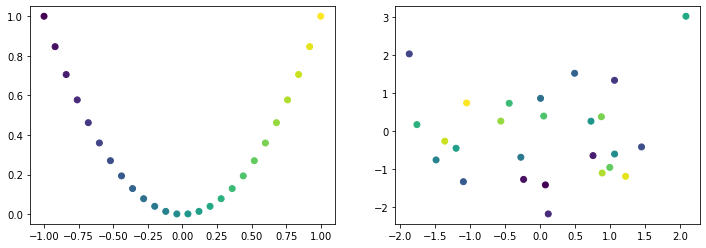

In [675]:
x1 = np.linspace(-1,1,26)
y1 = x1 ** 2

x2 = np.random.normal(0,1,size=len(x1))
y2 = np.random.normal(0,1,size=len(x1))

X = np.array([x1, x2]).T
Y = np.array([y1, y2]).T

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].scatter(x1, y1, c=x1)
ax[1].scatter(x2, y2, c=x1)

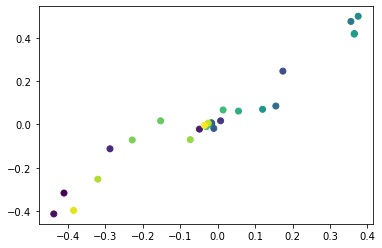

In [687]:
zetax = 5
zetay = 10

Kx = Kernel(X, X, rbf, beta=10)
Ky = Kernel(Y, Y, rbf, beta=10)

Jn = np.eye(len(X)) - 1 / len(X)

O = np.zeros((len(X), len(X)))

Kxy = Kx@Jn@Ky
Kxy = np.concatenate([O,Kxy], axis=1)
Kyx = Ky@Jn@Kx
Kyx = np.concatenate([Kyx,O], axis=1)
A = np.concatenate([Kxy,Kyx], axis=0)

Kxx = Kx@Jn@Kx + zetax*Kx
Kxx = np.concatenate([Kxx,O], axis=1)
Kyy = Ky@Jn@Ky + zetay*Ky
Kyy = np.concatenate([O,Kyy], axis=1)
B = np.concatenate([Kxx,Kyy], axis=0)

eig_values, eig_vectors = eig(A, B)
x_kcca = eig_vectors

alpha = x_kcca[:26,np.argmax(np.abs(eig_values))]
beta = x_kcca[26:,np.argmax(np.abs(eig_values))]

plt.scatter((alpha*Kx).sum(axis=1), (beta*Ky).sum(axis=1), c=x1)

In [2]:
290000*12+60000*12+900000

5100000